In [1]:
import pandas as pd
sample_data = pd.read_csv('./materials/nyc_bb_bicyclist_counts.csv')

# Poisson Process Modelling

## Random process
- A random process is a sequence of random variables X1, X2, X3,...etc. usually indexed by time.
- A random process can be either discrete or continuous.

## The Poisson process
### Attributes
- The Poisson process can be used to model the number of **occurrences of events**, such as patient arrivals at the ER, during a certain period of time, such as 24 hours, assuming that one knows **the average occurrence of those events** over some period of time. For example, an average of 10 patients walk into the ER per hour.
- The Poisson process’s constituent variables X1, X2, X3,…Xk all have a Poisson distribution, which is given by the Probability Mass Function: $P_X(k) = \frac{e^{-\lambda}\cdot \lambda ^k}{k!}$, of which k represents the number of occurrences per unit time, lambda is the parameter described above .

### Generate Some Data subject to Poisson distribution

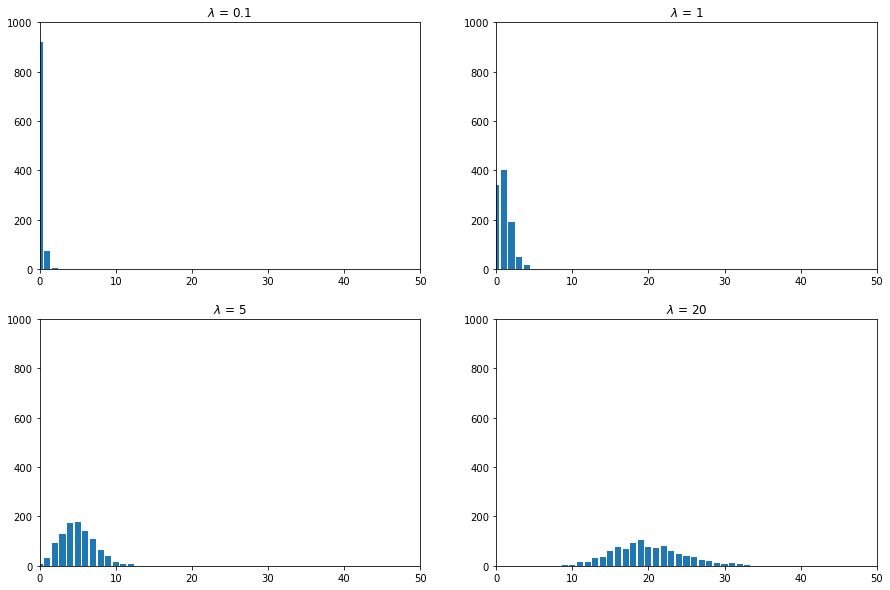

In [2]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
cnt=1
for lam in [0.1, 1, 5, 20]:
    data = pd.Series(np.random.poisson(lam=lam, size=1000))
    ax = plt.subplot(f'22{cnt}')
    plt.bar(data.value_counts().index, data.value_counts())
    plt.title(f'$\lambda$ = {lam}')
    plt.xlim(0, 50)
    plt.ylim(0, 1000)
    cnt += 1

### PMF of a poisson distrubution
- To know the likelihood of **k patients** walking into the ER **in t hours**, we model it as a Poisson process with a rate ($\lambda t$). The corresponding formula for the pmf for **k occurrences in time t** looks like this: $P_X(k)=\frac{(\lambda t)^k\cdot e^{-(\lambda t)}}{k!}$

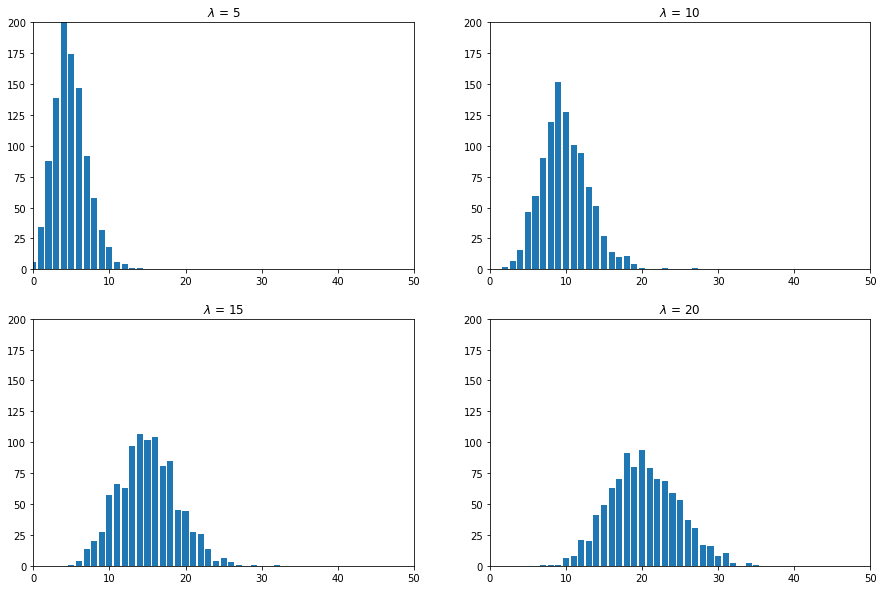

In [3]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
cnt=1
for t in range(4):
    t = t + 1
    lam = t * 5
    data = pd.Series(np.random.poisson(lam=lam, size=1000))
    ax = plt.subplot(f'22{cnt}')
    plt.bar(data.value_counts().index, data.value_counts())
    plt.title(f'$\lambda$ = {lam}')
    plt.xlim(0, 50)
    plt.ylim(0, 200)
    cnt += 1

### Modeling inter arrival times
- the time between each arrival is subjected to a **exponential distribution.**
- if x1, x2, x3, ... xk are the inter-arrival times, if we define t1, t2, t3, ... tk as the variables that will represent the **arrival times** of the event, we see that t1=x1, t2=x1+x2, t3=x1+x2+x3... And the arrival times, namely the t1, t2, t3,..,tk follow the Gamma distribution.

- To summary: poisson regression is associated with **three distributions**: 
    - The number of arrivals in time t is subject to a poisson distribution.
    - The inter-arrival times is subject to an exponential distribution.
    - The Arrival times is subject to a Gamma distribution.

### Simulating a poisson process

In [4]:
import random
import math

_lambda = 5
_num_arrivals = 100
_arrival_time = 0

print('RAND,INTER_ARRV_T,ARRV_T')

data = []
for i in range(_num_arrivals):
    #Get the next probability value from Uniform(0,1)
    p = random.random()

    #Plug it into the inverse of the CDF of Exponential(_lamnbda)
    _inter_arrival_time = -math.log(1.0 - p)/_lambda

    #Add the inter-arrival time to the running sum
    _arrival_time = _arrival_time + _inter_arrival_time

    #print it all out
    print(str(p)+','+str(_inter_arrival_time)+','+str(_arrival_time))
    data.append((_arrival_time, _inter_arrival_time))

RAND,INTER_ARRV_T,ARRV_T
0.06604920093519517,0.013666303960323933,0.013666303960323933
0.9475444100741123,0.5895576747077292,0.6032239786680532
0.15162344112535941,0.03288613729538045,0.6361101159634337
0.7985017595980024,0.32039492602596353,0.9565050419893972
0.5762676328586904,0.17173064652383885,1.128235688513236
0.9353943752759453,0.5478907603904298,1.6761264489036658
0.08450890188791327,0.01765892768813856,1.6937853765918043
0.21668039490910174,0.04884289721629771,1.742628273808102
0.6951225325838181,0.23756906585455875,1.9801973396626609
0.9164459001960108,0.49645219101578625,2.476649530678447
0.7385981130574975,0.26833925184326,2.744988782521707
0.9484955307422088,0.5932173386746156,3.3382061211963228
0.5593038595456085,0.1638799329868614,3.502086054183184
0.03310834034696175,0.006733765478573228,3.508819819661757
0.6170040371174438,0.1919461661267322,3.700765985788489
0.14118669214616175,0.03044074344535529,3.731206729233844
0.09094596784287434,0.019070149050850672,3.7502768782

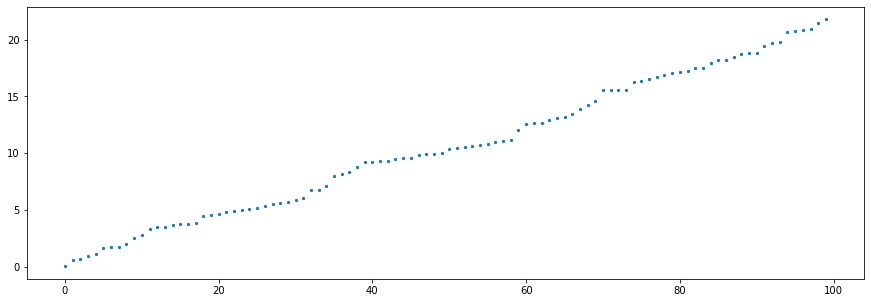

In [5]:
data = pd.DataFrame(data, columns=['arrival', 'inter_arrival'])
plt.figure(figsize=(15, 5))
plt.scatter(data.index, data.arrival, s=5)
plt.show()

- if rounds up the arrival times to the nearest hour and rotates the plot by 90 degrees, one can spot the average arrival rate of 5 per hour showing through.

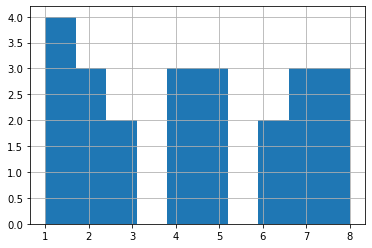

In [6]:
data['arrival_hour'] = data.arrival.round()
stat = data.arrival_hour.value_counts()
stat.hist()

# Examples of Poisson Regression Model
- A data set of counts has the following characteristics and can be forecasted by the model:
    - Whole number data
    - Skewed Distribution
    - Sparsity
    - Rate of occurrence. it can be assumed that there is a certain rate of occurrence of events $\lambda$ that drives the generation of such data. The event rate may drift over time.

## Model a poisson process for constant $\lambda$
- The expected value (mean) for a Poisson distribution is λ. Thus in the absence of other information, one should expect to see λ events in any unit time interval such as 1 hour, 1 day, etc. For any interval t, one would expect to see λt events.

In [7]:
import random
import math

_lambda = 5
_num_total_arrivals = 150
_num_arrivals = 0
_arrival_time = 0
_num_arrivals_in_unit_time = []
_time_tick = 1

print('RANDOM_N,INTER_ARRIVAL_TIME,EVENT_ARRIVAL_TIME')

for i in range(_num_total_arrivals):
    #Get the next probability value from Uniform(0,1)
    p = random.random()

    #Plug it into the inverse of the CDF of Exponential(_lamnbda)
    _inter_arrival_time = -math.log(1.0 - p)/_lambda

    #Add the inter-arrival time to the running sum
    _arrival_time = _arrival_time + _inter_arrival_time

    #Increment the number of arrival per unit time
    _num_arrivals = _num_arrivals + 1
    if _arrival_time > _time_tick:
        _num_arrivals_in_unit_time.append(_num_arrivals)
        _num_arrivals = 0
        _time_tick = _time_tick + 1

    #print it all out
    print(str(p)+','+str(_inter_arrival_time)+','+str(_arrival_time))

print('\nNumber of arrivals in successive unit length intervals ===>')
print(_num_arrivals_in_unit_time)
print('Mean arrival rate for sample:' + str(sum(_num_arrivals_in_unit_time)/len(_num_arrivals_in_unit_time)))

RANDOM_N,INTER_ARRIVAL_TIME,EVENT_ARRIVAL_TIME
0.23930365969122447,0.05470420558850085,0.05470420558850085
0.37121730380921025,0.09279391140526791,0.14749811699376875
0.2691250960107384,0.06270259277008272,0.21020070976385147
0.45499899512209974,0.12139352810158635,0.33159423786543785
0.42516831274589817,0.11073559977079259,0.44232983763623046
0.7750292299785626,0.2983569592465435,0.740686796882774
0.1623760719076598,0.035437210477672856,0.7761240073604468
0.5673640539862833,0.16757173519140173,0.9436957425518486
0.6610730620725841,0.21639414343359392,1.1600898859854425
0.3372762172654248,0.08227939857972415,1.2423692845651666
0.4312709385397615,0.11287022488192629,1.3552395094470928
0.8068065151468526,0.32881261601290535,1.6840521254599983
0.6513066892066773,0.21071250175115225,1.8947646272111505
0.27303307361638796,0.06377485915319656,1.958539486364347
0.1722926287324843,0.03781912068134631,1.9963586070456933
0.03920905600540692,0.007999686749035726,2.004358293794729
0.03049193698243

## Model a Poisson regression model for a non-constant $\lambda$

In [8]:
sample_data
print('The description of the columns:')
print('\tdate', 'the highest temperature, the lowest temperature, the precipitation, brooklyn bridge count cyclers')
sample_data.head()

The description of the columns:
	date the highest temperature, the lowest temperature, the precipitation, brooklyn bridge count cyclers


,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


### Model Construction
- In a Poisson Regression model, the event counts y are assumed to be Poisson distributed, which means the probability of observing y is a function of the event rate vector $\lambda$
- The structure of the model:
- ![](./materials/05_structure_of_poisson_regression.png)
- what might be a good link function f(.) connecting $\lambda$ with X? It turns out the following exponential link-funcion works great.
- ![](./materials/05_link_function.png)
- ![](./materials/05_pmf_of_model.png)

### Estimate method: MLE
- Our assumption is that the bicyclist counts shown in the red box arise from a Poisson process. Hence we can say that their probabilities of occurrence is given by the Poisson PMF. Here are the probabilities for the first 4 occurrences:
  - $P(3468|x_1)=\frac{e^{-\lambda_1} \cdot \lambda_1^{3468}}{3468!}$
  - $P(3271|x_1)=\frac{e^{-\lambda_2} \cdot \lambda_1^{3271}}{3468!}$
  - $P(2589|x_1)=\frac{e^{-\lambda_3} \cdot \lambda_1^{2589}}{3468!}$
  - $P(1805|x_1)=\frac{e^{-\lambda_4} \cdot \lambda_1^{1805}}{3468!}$
  - The above observation corresponding to the following data

In [9]:
sample_data['date'] = pd.to_datetime(sample_data.Date)
sample_data[sample_data.date >= pd.to_datetime('2017-06-01')].head(6)

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT,date
61,1-Jun-17,78.1,62.1,0.00,3468,2017-06-01
62,2-Jun-17,73.9,60.1,0.01,3271,2017-06-02
63,3-Jun-17,72.0,55.0,0.01,2589,2017-06-03
64,4-Jun-17,68.0,60.1,0.09,1805,2017-06-04
65,5-Jun-17,66.9,60.1,0.02,2171,2017-06-05
66,6-Jun-17,55.9,53.1,0.06,1193,2017-06-06


![](./materials/05_estimation_mle.png)

- Log likehood function of the above function:
$$
ln L(\beta) = \sum^n_{i=1}(y_i {\bf{x_i\beta}}-e^{{\bf{x_i\beta}}}-lny_i!)
$$
- differentiate this log-likelihood equation w.r.t $\beta$ and set it to zero. This operation gives us the following equation:
  - $\sum^n_{i=1} (y_i-e^{\bf x_i \beta}){\bf x_i} = 0$

### Apply the model to the sample dataset in python

In [10]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
sample_data.index = sample_data.date
ds = sample_data.index.to_series()
sample_data['MONTH'] = ds.dt.month
sample_data['DAY_OF_WEEK'] = ds.dt.dayofweek
sample_data['DAY'] = ds.dt.day

In [12]:
mask = np.random.rand(len(sample_data)) < 0.8
df_train = sample_data[mask]
df_test = sample_data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=168
Testing data set length=46


In [13]:
expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [14]:
y_train.head()

,BB_COUNT
date,
2017-04-02,2021.0
2017-04-03,2470.0
2017-04-05,2807.0
2017-04-07,1222.0
2017-04-09,2375.0


In [15]:
X_train.head()

,Intercept,DAY,DAY_OF_WEEK,MONTH,HIGH_T,LOW_T,PRECIP
date,,,,,,,
2017-04-02,1.0,2.0,6.0,4.0,62.1,41.0,0.00
2017-04-03,1.0,3.0,0.0,4.0,63.0,50.0,0.03
2017-04-05,1.0,5.0,2.0,4.0,63.0,46.0,0.00
2017-04-07,1.0,7.0,4.0,4.0,48.0,43.0,0.01
2017-04-09,1.0,9.0,6.0,4.0,66.0,45.0,0.00


In [16]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  168
Model:                            GLM   Df Residuals:                      161
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11143.
Date:                Tue, 10 Mar 2020   Deviance:                       20662.
Time:                        23:05:51   Pearson chi2:                 2.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2558      0.013    558.707      

In [17]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
date                                                            
2017-04-01  2030.965794  12.004696    2007.572789    2054.631384
2017-04-04   951.603715   8.900038     934.318869     969.208330
2017-04-06  1271.248041   8.678311    1254.352149    1288.371517
2017-04-08  2398.039370  11.291154    2376.010917    2420.272054
2017-04-10  3309.607703  13.853686    3282.566057    3336.872116
2017-04-20  2363.085090   8.129605    2347.204956    2379.072663
2017-04-25  1160.714188   8.707278    1143.773084    1177.906216
2017-05-08  2679.247719  11.801637    2656.216496    2702.478638
2017-05-09  2717.904548   9.873860    2698.620873    2737.326019
2017-05-17  3803.124354  16.884596    3770.174719    3836.361954
2017-05-30  2234.089722  10.803807    2213.014684    2255.365462
2017-06-01  3075.364648   9.707482    3056.397067    3094.449939
2017-06-06  2208.200147  10.674498    2187.377315    2229.221202
2017-06-08  2589.568246  

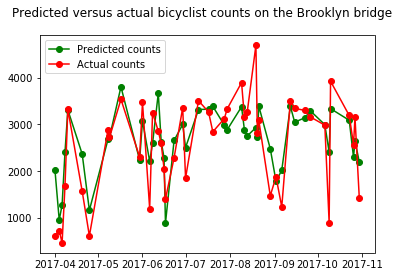

In [18]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

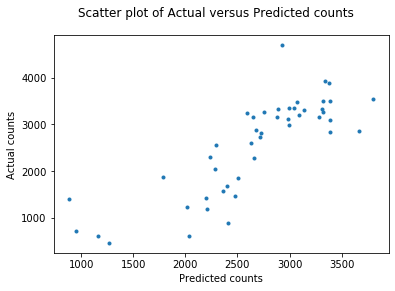

In [19]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

- The reported values of Deviance and Pearson chi-squared are very large. A good fit is virtually impossible given these values. To make a quantitative determination of the goodness-of-fit at some confidence level, say 95% (p=0.05), we look up the value in the χ2 table for p=0.05 and Degrees of freedom of residuals=163. (DF Residuals = No. Observations minus DF model]). We compare this Chi-Squared value with the observed statistic, in this case, the Deviance or the Pearson’s chi-squared value reported in GLMResults. We find that at p=0.05 and DF Residuals = 163, the chi-squared value from a standard Chi-Squared table is 193.791 which is much smaller than the reported statistic of 23030 and 23300. Hence as per this test, the Poisson regression model, in spite of demonstrating an ‘okay’ visual fit for the test data set, has fit the training data rather poorly.